In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import numpy as np
from skopt import gp_minimize

def func(x, noise_lvl=0.1, nu=1., noise='normal'):
    x = np.asarray(x)
    n = x.shape[0]
    if noise == 'uniform':
        noise = np.random.uniform(-noise_lvl/2., noise_lvl/2., n)
    else:
        noise = np.random.randn(n) * noise_lvl
    y = -np.sin(10 * x) * (1. - np.tanh(x ** 4)) - (x-nu)*noise
    if n == 1:
        return y.item()
    else:
        return y

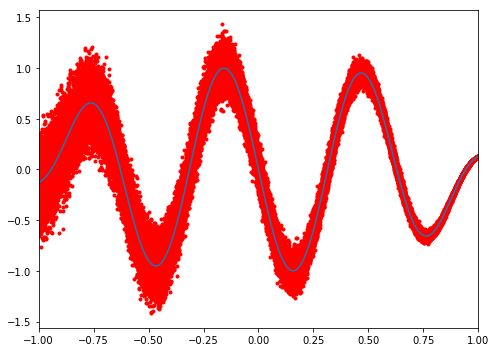

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))

n_plot = 100000
xmin, xmax = -1., 1.
x_plot = np.linspace(xmin, xmax, n_plot)
y_noise = func(x_plot)
y_true = func(x_plot, noise_lvl=0.)
ax.plot(x_plot, y_noise, 'r.')
ax.plot(x_plot, y_true, '-')
ax.set_xlim(xmin, xmax)
fig.tight_layout()

In [15]:
from skopt.learning import GradientBoostingQuantileRegressor

alpha = 0.05
qrf = GradientBoostingQuantileRegressor()

In [16]:
from skopt import forest_minimize

n_random_start = 10
n_iter = 10
n_calls = n_random_start + n_iter
space = [(xmin, xmax)]

res = forest_minimize(func, space, acq_func="EI", base_estimator=qrf, n_calls=n_calls, n_random_starts=n_random_start)

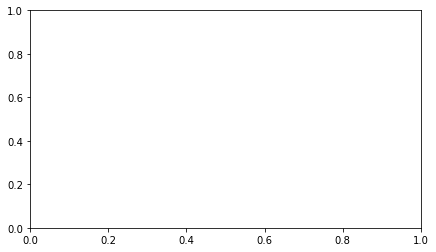

In [17]:
fig, ax = plt.subplots(figsize=(7, 4))